# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [5]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    #cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    cifar10_dir = r'C:\Users\uids6815\Linux\cs231n\hw\1516\assignment1\datasets\cifar-10-batches-py'

    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [6]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [8]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
iters = 2000
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg, num_iters=iters)
        
        y_train_pred = svm.predict(X_train_feats) 
        acc_train = np.mean(y_train == y_train_pred)  
        
        y_val_pred = svm.predict(X_val_feats) 
        acc_val = np.mean(y_val == y_val_pred) 
        
        results[(lr, reg)] = (acc_train, acc_val)
        if best_val < acc_val:
            best_val = acc_val
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.095265 val accuracy: 0.079000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.083449 val accuracy: 0.077000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.364857 val accuracy: 0.354000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.087041 val accuracy: 0.073000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.410571 val accuracy: 0.413000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.410347 val accuracy: 0.409000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.412959 val accuracy: 0.419000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.403776 val accuracy: 0.390000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.364408 val accuracy: 0.332000
best validation accuracy achieved during cross-validation: 0.419000


In [9]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.418


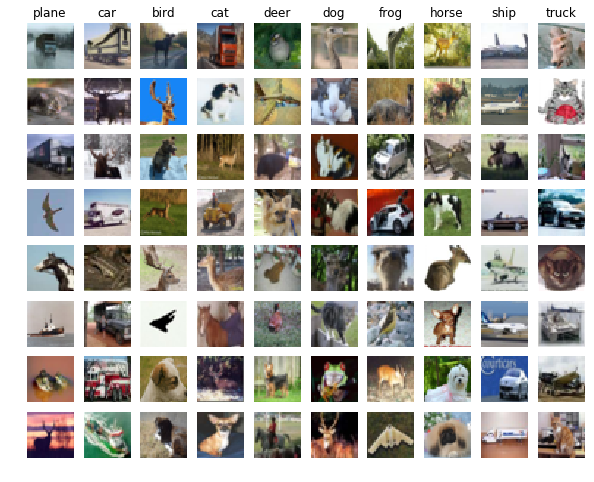

In [10]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [11]:
print(X_train_feats.shape)

(49000L, 155L)


 batch_size: 200, lr: 0.100000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302646
iteration 200 / 1500: loss 2.144983
iteration 300 / 1500: loss 1.773611
iteration 400 / 1500: loss 1.626143
iteration 500 / 1500: loss 1.494760
iteration 600 / 1500: loss 1.524062
iteration 700 / 1500: loss 1.477988
iteration 800 / 1500: loss 1.411615
iteration 900 / 1500: loss 1.406020
iteration 1000 / 1500: loss 1.447510
iteration 1100 / 1500: loss 1.372957
iteration 1200 / 1500: loss 1.335394
iteration 1300 / 1500: loss 1.477939
iteration 1400 / 1500: loss 1.337748
Validation accuracy:  0.519


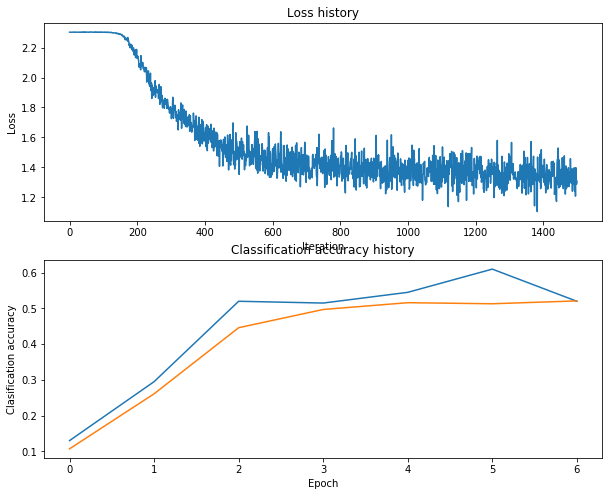

 batch_size: 200, lr: 0.100000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 2.302032
iteration 200 / 1500: loss 2.176289
iteration 300 / 1500: loss 1.867732
iteration 400 / 1500: loss 1.732810
iteration 500 / 1500: loss 1.666118
iteration 600 / 1500: loss 1.485675
iteration 700 / 1500: loss 1.509105
iteration 800 / 1500: loss 1.560988
iteration 900 / 1500: loss 1.678891
iteration 1000 / 1500: loss 1.554906
iteration 1100 / 1500: loss 1.443549
iteration 1200 / 1500: loss 1.524585
iteration 1300 / 1500: loss 1.332502
iteration 1400 / 1500: loss 1.398112
Validation accuracy:  0.513


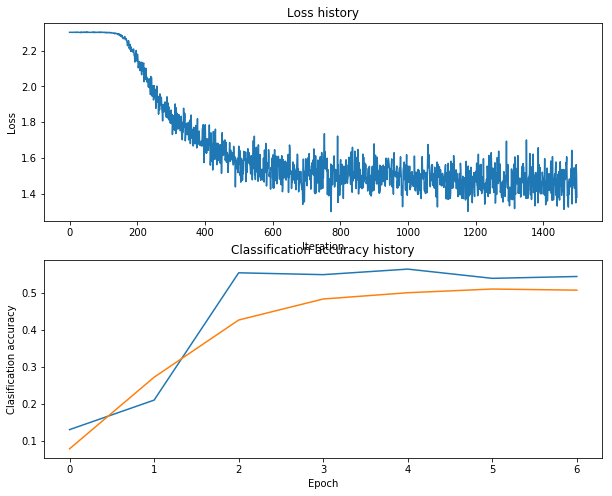

 batch_size: 200, lr: 0.100000, reg: 0.010000
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss 2.301627
iteration 200 / 1500: loss 2.173043
iteration 300 / 1500: loss 1.786386
iteration 400 / 1500: loss 1.823474
iteration 500 / 1500: loss 1.692191
iteration 600 / 1500: loss 1.683155
iteration 700 / 1500: loss 1.583925
iteration 800 / 1500: loss 1.644231
iteration 900 / 1500: loss 1.582472
iteration 1000 / 1500: loss 1.517212
iteration 1100 / 1500: loss 1.566704
iteration 1200 / 1500: loss 1.429092
iteration 1300 / 1500: loss 1.618180
iteration 1400 / 1500: loss 1.674630
Validation accuracy:  0.522


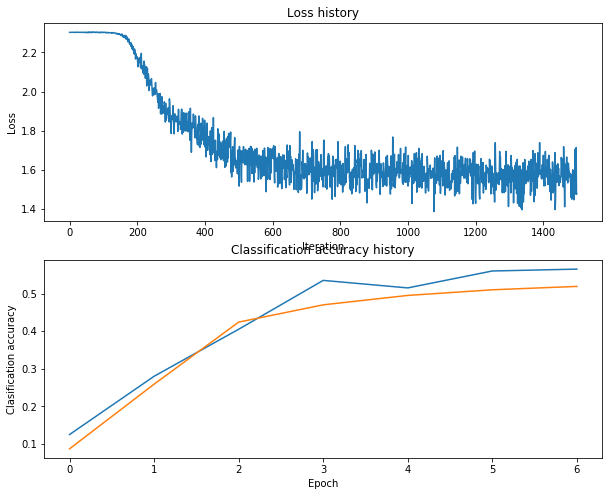

 batch_size: 200, lr: 0.500000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.600627
iteration 200 / 1500: loss 1.501420
iteration 300 / 1500: loss 1.321347
iteration 400 / 1500: loss 1.347147
iteration 500 / 1500: loss 1.300513
iteration 600 / 1500: loss 1.314483
iteration 700 / 1500: loss 1.331019
iteration 800 / 1500: loss 1.255502
iteration 900 / 1500: loss 1.172898
iteration 1000 / 1500: loss 1.281431
iteration 1100 / 1500: loss 1.099874
iteration 1200 / 1500: loss 1.111226
iteration 1300 / 1500: loss 1.191713
iteration 1400 / 1500: loss 1.223884
Validation accuracy:  0.585


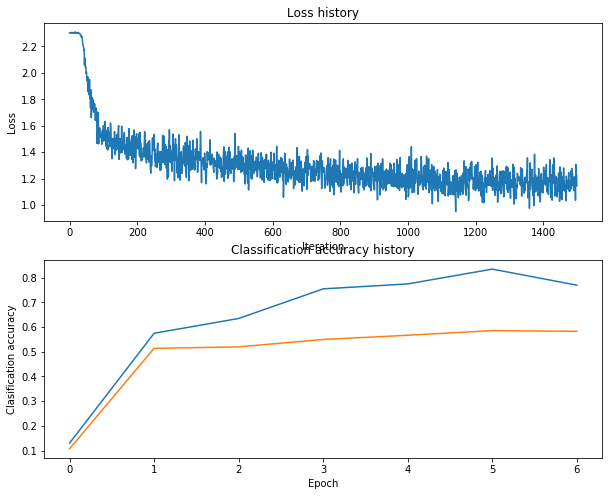

 batch_size: 200, lr: 0.500000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 1.677960
iteration 200 / 1500: loss 1.549892
iteration 300 / 1500: loss 1.497763
iteration 400 / 1500: loss 1.523008
iteration 500 / 1500: loss 1.607505
iteration 600 / 1500: loss 1.442274
iteration 700 / 1500: loss 1.443996
iteration 800 / 1500: loss 1.467637
iteration 900 / 1500: loss 1.460080
iteration 1000 / 1500: loss 1.547280
iteration 1100 / 1500: loss 1.529391
iteration 1200 / 1500: loss 1.385795
iteration 1300 / 1500: loss 1.292442
iteration 1400 / 1500: loss 1.441689
Validation accuracy:  0.541


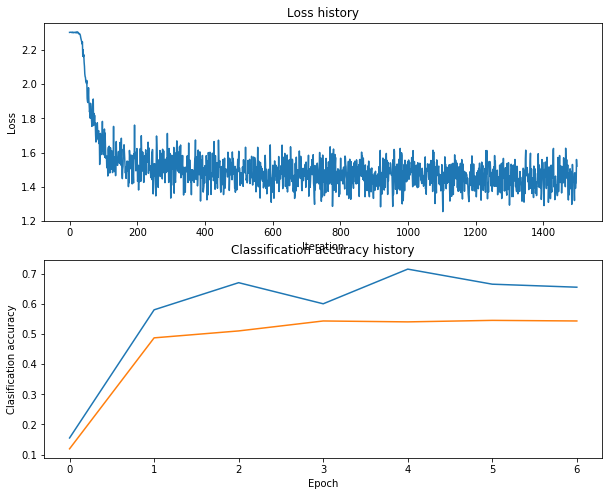

 batch_size: 200, lr: 0.500000, reg: 0.010000
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss 1.525018
iteration 200 / 1500: loss 1.626854
iteration 300 / 1500: loss 1.686776
iteration 400 / 1500: loss 1.580958
iteration 500 / 1500: loss 1.614143
iteration 600 / 1500: loss 1.553753
iteration 700 / 1500: loss 1.476856
iteration 800 / 1500: loss 1.634334
iteration 900 / 1500: loss 1.539950
iteration 1000 / 1500: loss 1.667663
iteration 1100 / 1500: loss 1.532501
iteration 1200 / 1500: loss 1.684883
iteration 1300 / 1500: loss 1.579096
iteration 1400 / 1500: loss 1.577682
Validation accuracy:  0.493


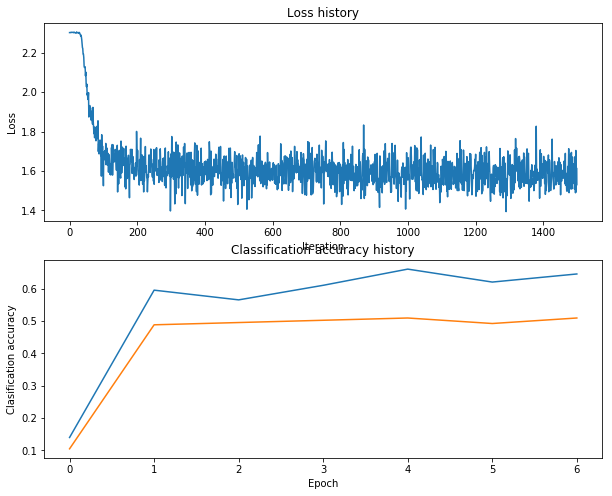

 batch_size: 200, lr: 1.000000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.447628
iteration 200 / 1500: loss 1.295866
iteration 300 / 1500: loss 1.394523
iteration 400 / 1500: loss 1.401141
iteration 500 / 1500: loss 1.247661
iteration 600 / 1500: loss 1.203938
iteration 700 / 1500: loss 1.260383
iteration 800 / 1500: loss 1.232440
iteration 900 / 1500: loss 1.266099
iteration 1000 / 1500: loss 1.210960
iteration 1100 / 1500: loss 1.151093
iteration 1200 / 1500: loss 1.201134
iteration 1300 / 1500: loss 1.258547
iteration 1400 / 1500: loss 1.266200
Validation accuracy:  0.569


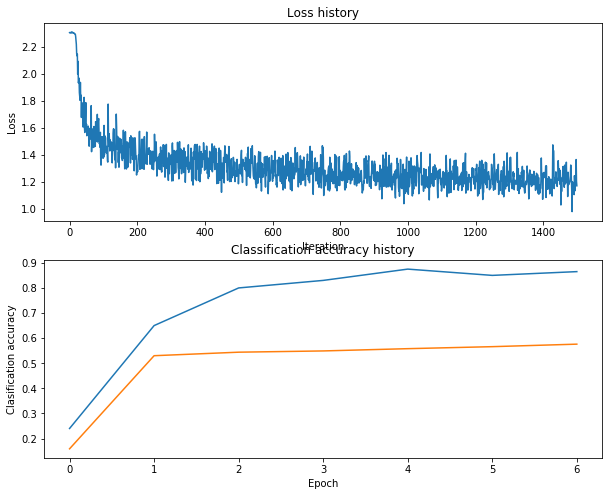

 batch_size: 200, lr: 1.000000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 1.758478
iteration 200 / 1500: loss 1.617986
iteration 300 / 1500: loss 1.473745
iteration 400 / 1500: loss 1.551247
iteration 500 / 1500: loss 1.583028
iteration 600 / 1500: loss 1.497638
iteration 700 / 1500: loss 1.578411
iteration 800 / 1500: loss 1.604122
iteration 900 / 1500: loss 1.554492
iteration 1000 / 1500: loss 1.573609
iteration 1100 / 1500: loss 1.653552
iteration 1200 / 1500: loss 1.645916
iteration 1300 / 1500: loss 1.479070
iteration 1400 / 1500: loss 1.454893
Validation accuracy:  0.525


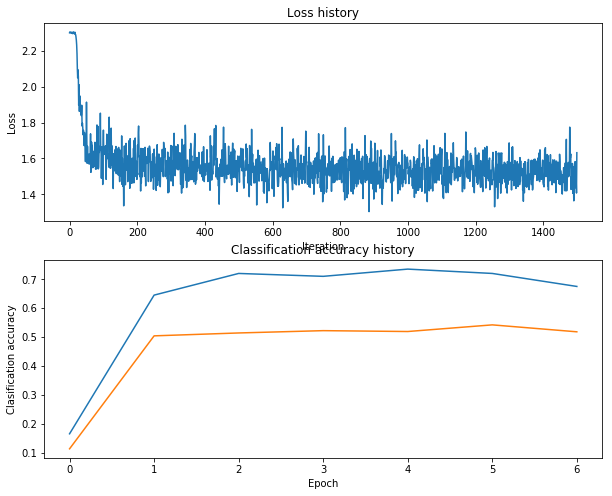

 batch_size: 200, lr: 1.000000, reg: 0.010000
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss 1.736001
iteration 200 / 1500: loss 1.701222
iteration 300 / 1500: loss 1.665549
iteration 400 / 1500: loss 1.664299
iteration 500 / 1500: loss 1.767011
iteration 600 / 1500: loss 1.568164
iteration 700 / 1500: loss 1.675124
iteration 800 / 1500: loss 1.750038
iteration 900 / 1500: loss 1.784469
iteration 1000 / 1500: loss 1.691454
iteration 1100 / 1500: loss 1.732780
iteration 1200 / 1500: loss 1.679910
iteration 1300 / 1500: loss 1.630320
iteration 1400 / 1500: loss 1.665277
Validation accuracy:  0.511


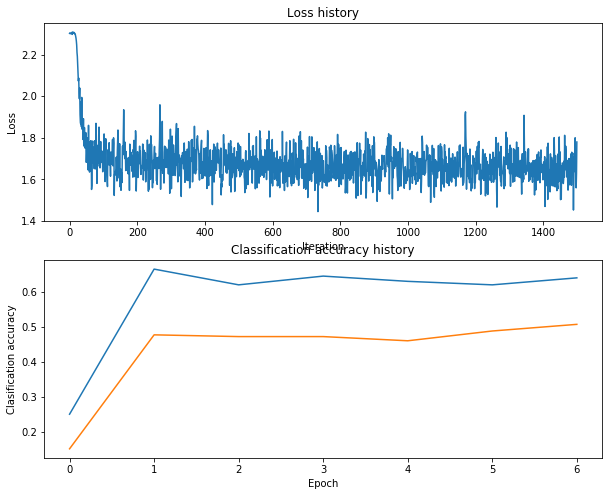

 batch_size: 300, lr: 0.100000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.300992
iteration 200 / 1500: loss 2.140714
iteration 300 / 1500: loss 1.748073
iteration 400 / 1500: loss 1.566383
iteration 500 / 1500: loss 1.488196
iteration 600 / 1500: loss 1.469105
iteration 700 / 1500: loss 1.422891
iteration 800 / 1500: loss 1.390869
iteration 900 / 1500: loss 1.339000
iteration 1000 / 1500: loss 1.332965
iteration 1100 / 1500: loss 1.362197
iteration 1200 / 1500: loss 1.382276
iteration 1300 / 1500: loss 1.301114
iteration 1400 / 1500: loss 1.373176
Validation accuracy:  0.524


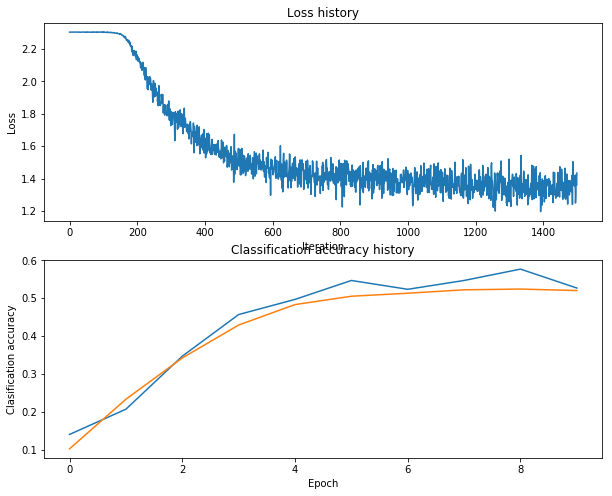

 batch_size: 300, lr: 0.100000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 2.301803
iteration 200 / 1500: loss 2.164729
iteration 300 / 1500: loss 1.809689
iteration 400 / 1500: loss 1.808368
iteration 500 / 1500: loss 1.616870
iteration 600 / 1500: loss 1.568891
iteration 700 / 1500: loss 1.495997
iteration 800 / 1500: loss 1.513287
iteration 900 / 1500: loss 1.475995
iteration 1000 / 1500: loss 1.427490
iteration 1100 / 1500: loss 1.595870
iteration 1200 / 1500: loss 1.436421
iteration 1300 / 1500: loss 1.544686
iteration 1400 / 1500: loss 1.457880
Validation accuracy:  0.519


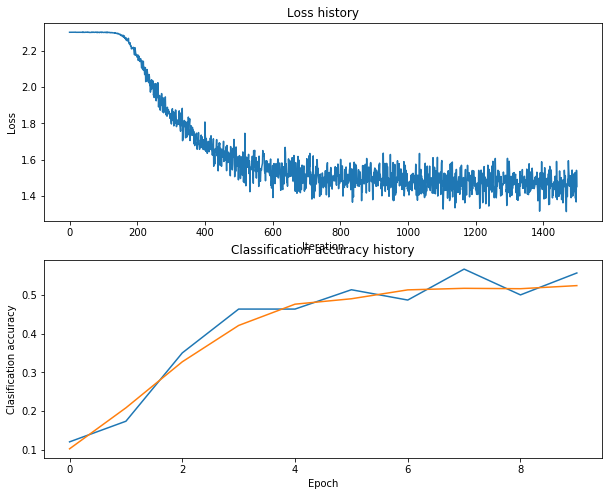

 batch_size: 300, lr: 0.100000, reg: 0.010000
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss 2.302268
iteration 200 / 1500: loss 2.172677
iteration 300 / 1500: loss 1.882126
iteration 400 / 1500: loss 1.785485
iteration 500 / 1500: loss 1.708596
iteration 600 / 1500: loss 1.565555
iteration 700 / 1500: loss 1.525148
iteration 800 / 1500: loss 1.581928
iteration 900 / 1500: loss 1.578786
iteration 1000 / 1500: loss 1.558137
iteration 1100 / 1500: loss 1.545086
iteration 1200 / 1500: loss 1.560233
iteration 1300 / 1500: loss 1.584066
iteration 1400 / 1500: loss 1.638893
Validation accuracy:  0.505


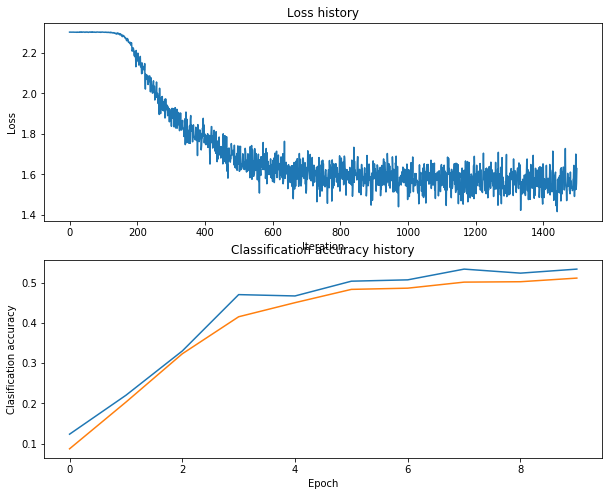

 batch_size: 300, lr: 0.500000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.460330
iteration 200 / 1500: loss 1.461381
iteration 300 / 1500: loss 1.378190
iteration 400 / 1500: loss 1.252881
iteration 500 / 1500: loss 1.266473
iteration 600 / 1500: loss 1.211654
iteration 700 / 1500: loss 1.309039
iteration 800 / 1500: loss 1.275533
iteration 900 / 1500: loss 1.156394
iteration 1000 / 1500: loss 1.123508
iteration 1100 / 1500: loss 1.071220
iteration 1200 / 1500: loss 1.278077
iteration 1300 / 1500: loss 1.072314
iteration 1400 / 1500: loss 1.100639
Validation accuracy:  0.599


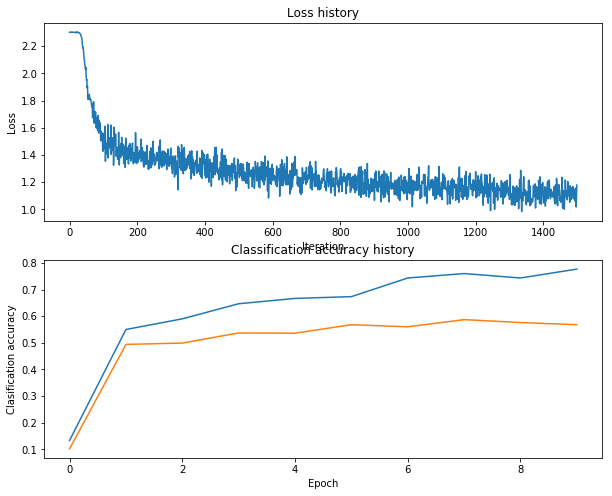

 batch_size: 300, lr: 0.500000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 1.558546
iteration 200 / 1500: loss 1.521370
iteration 300 / 1500: loss 1.438546
iteration 400 / 1500: loss 1.430578
iteration 500 / 1500: loss 1.398673
iteration 600 / 1500: loss 1.503260
iteration 700 / 1500: loss 1.476958
iteration 800 / 1500: loss 1.403367
iteration 900 / 1500: loss 1.392495
iteration 1000 / 1500: loss 1.477412
iteration 1100 / 1500: loss 1.481103
iteration 1200 / 1500: loss 1.448144
iteration 1300 / 1500: loss 1.482884
iteration 1400 / 1500: loss 1.399764
Validation accuracy:  0.541


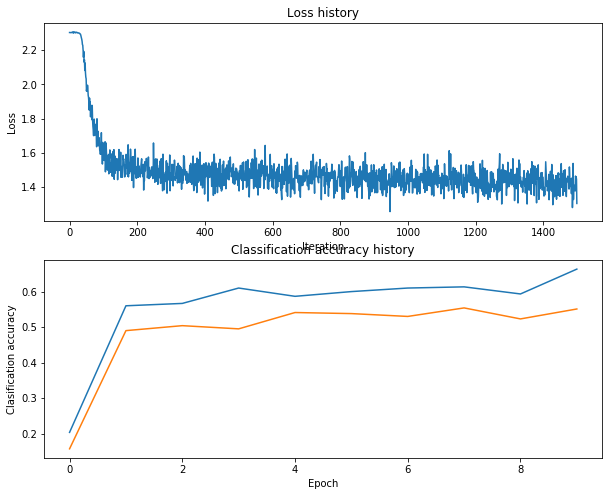

 batch_size: 300, lr: 0.500000, reg: 0.010000
iteration 0 / 1500: loss 2.302594
iteration 100 / 1500: loss 1.740069
iteration 200 / 1500: loss 1.475442
iteration 300 / 1500: loss 1.498463
iteration 400 / 1500: loss 1.585101
iteration 500 / 1500: loss 1.473483
iteration 600 / 1500: loss 1.582817
iteration 700 / 1500: loss 1.460936
iteration 800 / 1500: loss 1.620973
iteration 900 / 1500: loss 1.609783
iteration 1000 / 1500: loss 1.672697
iteration 1100 / 1500: loss 1.541362
iteration 1200 / 1500: loss 1.573968
iteration 1300 / 1500: loss 1.589492
iteration 1400 / 1500: loss 1.489466
Validation accuracy:  0.52


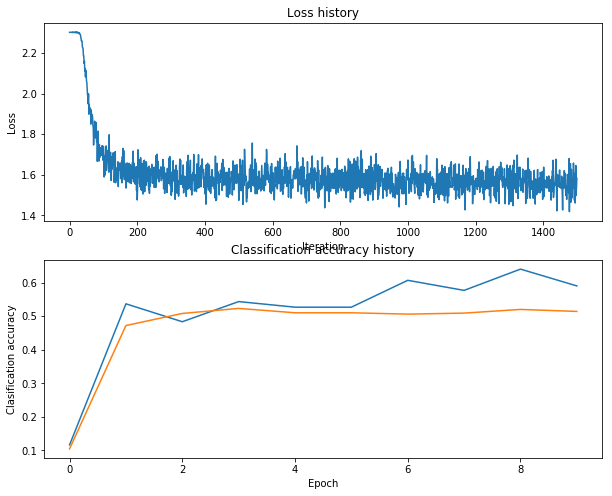

 batch_size: 300, lr: 1.000000, reg: 0.001000
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 1.367683
iteration 200 / 1500: loss 1.446333
iteration 300 / 1500: loss 1.242369
iteration 400 / 1500: loss 1.197880
iteration 500 / 1500: loss 1.235734
iteration 600 / 1500: loss 1.245097
iteration 700 / 1500: loss 1.167328
iteration 800 / 1500: loss 1.109372
iteration 900 / 1500: loss 1.180335
iteration 1000 / 1500: loss 1.151511
iteration 1100 / 1500: loss 1.220970
iteration 1200 / 1500: loss 1.181189
iteration 1300 / 1500: loss 1.164814
iteration 1400 / 1500: loss 1.147879
Validation accuracy:  0.579


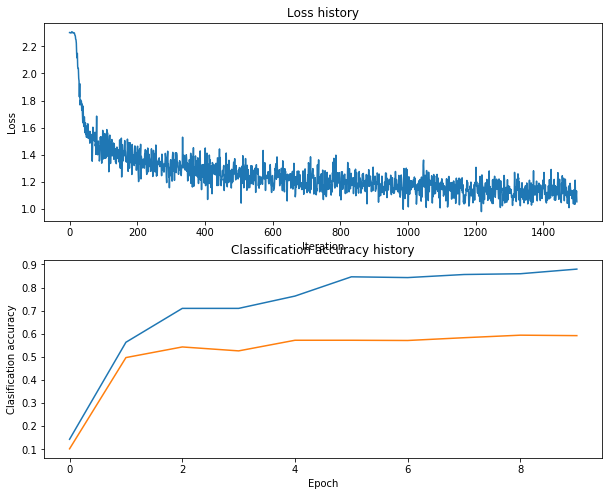

 batch_size: 300, lr: 1.000000, reg: 0.005000
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 1.469356
iteration 200 / 1500: loss 1.709105
iteration 300 / 1500: loss 1.404538
iteration 400 / 1500: loss 1.397057
iteration 500 / 1500: loss 1.455546
iteration 600 / 1500: loss 1.457134
iteration 700 / 1500: loss 1.528619
iteration 800 / 1500: loss 1.479007
iteration 900 / 1500: loss 1.519904
iteration 1000 / 1500: loss 1.579627
iteration 1100 / 1500: loss 1.392534
iteration 1200 / 1500: loss 1.400416
iteration 1300 / 1500: loss 1.505602
iteration 1400 / 1500: loss 1.434370
Validation accuracy:  0.552


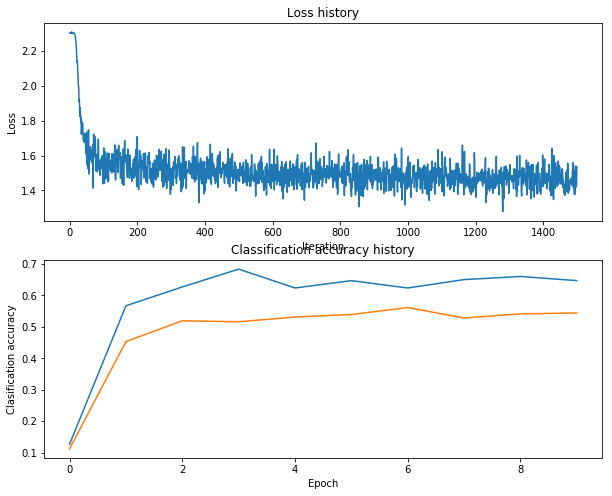

 batch_size: 300, lr: 1.000000, reg: 0.010000
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss 1.636585
iteration 200 / 1500: loss 1.569312
iteration 300 / 1500: loss 1.591277
iteration 400 / 1500: loss 1.584417
iteration 500 / 1500: loss 1.617511
iteration 600 / 1500: loss 1.596323
iteration 700 / 1500: loss 1.613315
iteration 800 / 1500: loss 1.591372
iteration 900 / 1500: loss 1.702832
iteration 1000 / 1500: loss 1.544257
iteration 1100 / 1500: loss 1.557682
iteration 1200 / 1500: loss 1.571743
iteration 1300 / 1500: loss 1.588630
iteration 1400 / 1500: loss 1.567968
Validation accuracy:  0.513


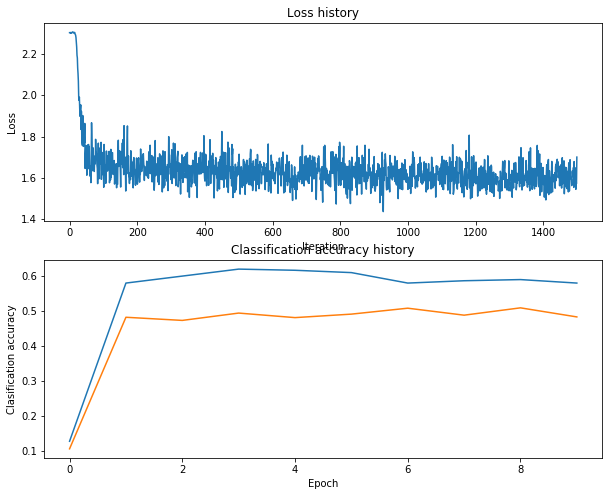

best_val : 0.599000


In [14]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1
learning_rates = [1e-1, 0.5, 1]
regularization_strengths = [1e-3, 5e-3, 1e-2]
batch_sizes = [200, 300]
for batch_size in batch_sizes:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print(" batch_size: %d, lr: %f, reg: %f"%(batch_size, lr, reg))
            # Train the network
            net = TwoLayerNet(input_dim, hidden_dim, num_classes)
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                            num_iters=1500, batch_size=batch_size,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            print('Validation accuracy: ', val_acc)
            if val_acc > best_val:
                best_net = net
                best_val = val_acc
                
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.show()
            
print("best_val : %f"%best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [15]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.503


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!